In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_training = pd.read_csv('datasetC.csv', header=None)
df_testing = pd.read_csv('datasetCTest.csv', header=None)

# X is all the data except the last column
X_training = df_training.iloc[:, :-1]

# y is the last column
y_training = df_training.iloc[:, -1]

1    1129
3    1034
2     992
4     981
5     864
Name: 400, dtype: int64

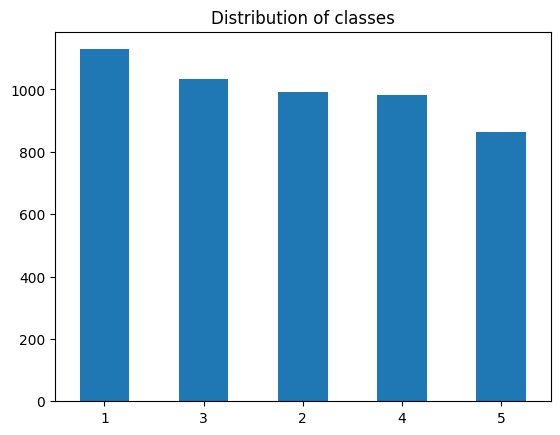

In [3]:
# Class distribution of target variable
y_training.value_counts().plot(kind='bar', title='Distribution of classes', rot=0)
y_training.value_counts()

In [4]:
# Correlation between features
X_training.corr()

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,1.000000,0.023762,0.011433,0.007512,0.005573,0.015382,0.023929,-0.001405,-0.012774,-0.015448,...,-0.022960,0.004269,-0.010699,-0.021324,-0.009099,0.016734,-0.014984,0.006427,0.032904,-0.024859
1,0.023762,1.000000,0.000873,0.005431,-0.007387,0.000205,0.030547,-0.028660,0.024488,0.009758,...,0.000277,-0.009473,0.008321,0.001057,0.018563,0.005878,-0.011490,0.005029,-0.000419,0.006319
2,0.011433,0.000873,1.000000,0.009807,0.000387,0.031439,0.019733,0.027408,0.024649,0.022179,...,0.003267,-0.010638,0.001114,0.012579,-0.002357,0.011474,0.009268,-0.000021,-0.008952,-0.002589
3,0.007512,0.005431,0.009807,1.000000,-0.017648,0.023699,-0.001217,-0.027083,0.023774,0.011220,...,-0.006812,0.001678,-0.028242,-0.011615,-0.002818,-0.003531,-0.013692,0.001419,0.004088,0.005170
4,0.005573,-0.007387,0.000387,-0.017648,1.000000,-0.008458,0.016542,-0.017832,0.000780,-0.005243,...,-0.016742,0.014445,-0.003528,0.003678,0.027024,0.006217,0.032582,0.008608,-0.006004,-0.013917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.016734,0.005878,0.011474,-0.003531,0.006217,0.016082,-0.000819,0.006685,-0.009395,-0.007702,...,-0.027414,0.019385,0.006103,0.017449,0.030826,1.000000,0.023777,0.029755,0.010168,0.011328
396,-0.014984,-0.011490,0.009268,-0.013692,0.032582,-0.008973,-0.016585,0.014896,-0.007360,-0.010846,...,0.005566,0.001513,0.032207,0.002800,0.026194,0.023777,1.000000,0.032224,0.011362,-0.004897
397,0.006427,0.005029,-0.000021,0.001419,0.008608,0.009302,-0.003393,-0.012857,-0.003396,0.014985,...,-0.001305,0.016944,0.010365,0.014653,-0.003179,0.029755,0.032224,1.000000,0.015493,0.004359
398,0.032904,-0.000419,-0.008952,0.004088,-0.006004,0.002316,0.026576,0.014230,-0.006432,-0.003585,...,-0.000644,0.026662,0.001661,0.008674,0.002670,0.010168,0.011362,0.015493,1.000000,0.003650


In [5]:
# Compute the correlation of each feature with the target
feature_correlation = X_training.apply(lambda x: x.corr(y_training))

# Select features with absolute correlation greater than 0.5 or less than -0.5
corr_features = feature_correlation[abs(feature_correlation) > 0.5].index

print(len(corr_features))

"""
    The correlation between the features is very low.
"""


0


'\n    The correlation between the features is very low.\n'

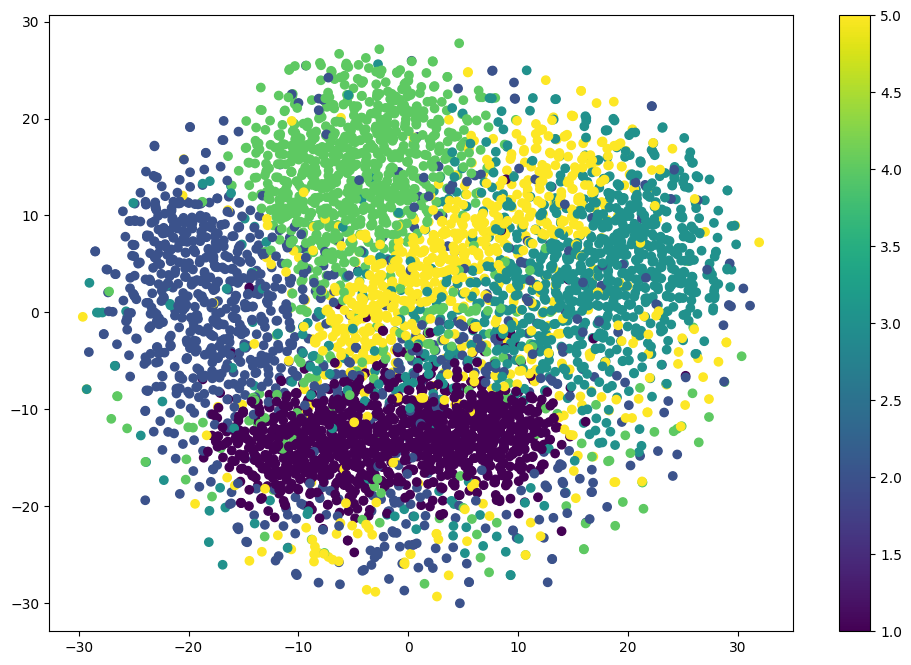

In [6]:
#t-SNE visualization of the data
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
#X_tsne = tsne.fit_transform(X_training)
X_tsne = tsne.fit_transform(X_training.iloc[:5000, :])

plt.figure(figsize=(12, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_training, cmap='viridis')
plt.colorbar()
plt.show()


In [12]:
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [21]:
# Initialization of models
models = {
    "random_forest" : RandomForestClassifier(max_depth=50, min_samples_leaf=8, min_samples_split=6, n_estimators=700),
    "xgboost": OneVsRestClassifier(XGBClassifier(colsample_bytree=0.9, learning_rate=0.1, max_depth=10, n_estimators=200, subsample=0.6,random_state=42)),
    "SGD" : SGDClassifier(random_state=42),
    "svc" : OneVsRestClassifier(SVC()),
}

In [32]:
from sklearn.model_selection import train_test_split

#y_training = y_training - 1
x_train, x_test, y_train, y_test = train_test_split(X_training, y_training, test_size=0.25, random_state=42)

In [33]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [34]:
# saving the scaler for later use
import pickle
pickle.dump(scaler, open("myscaler.pkl", "wb"))

In [25]:
# Train the models

for i in range(len(list(models))):
  model = list(models.values())[i]
  model.fit(x_train_scaled, y_train)

  #Make predictions
  y_test_pred = model.predict(x_test_scaled)

  # Test set Performance
  accuracy = accuracy_score(y_test, y_test_pred)

  print(list(models.keys())[i])

  print('- Accuracy : {:.4f}'.format(accuracy))

  print('\n')


random_forest
- Accuracy : 0.7360


xgboost
- Accuracy : 0.8090


SGD
- Accuracy : 0.7590


svc
- Accuracy : 0.8330




In [10]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           1       0.84      0.94      0.89       215
           2       0.88      0.77      0.82       210
           3       0.81      0.82      0.82       214
           4       0.84      0.90      0.87       210
           5       0.79      0.69      0.73       151

    accuracy                           0.83      1000
   macro avg       0.83      0.82      0.83      1000
weighted avg       0.83      0.83      0.83      1000



In [35]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Convert labels to categorical one-hot encoding
y_train_categorical = to_categorical(y_train)

# Create a Sequential model
model_nn = Sequential()

# Add an input layer and a hidden layer with 20 neurons
model_nn.add(Dense(100, input_dim=x_train_scaled.shape[1], activation='relu'))
model_nn.add(BatchNormalization())

# model_nn.add(Dense(32, input_dim=x_train_scaled.shape[1], activation='relu'))
# model_nn.add(Dense(6, activation='softmax'))  # 6 neurons in the output layer

# Add dropout after the first hidden layer
model_nn.add(Dropout(0.5))

model_nn.add(Dense(30, activation='relu', kernel_regularizer='l2'))
model_nn.add(BatchNormalization())

# Add dropout after the second hidden layer
model_nn.add(Dropout(0.5))

# Add an output layer with a neuron for each class, using softmax activation
model_nn.add(Dense(y_train_categorical.shape[1], activation='softmax'))

# Compile the model
model_nn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='loss', patience=10)

# Define learning rate reduction
lr_reduction = ReduceLROnPlateau(monitor='loss', patience=2, verbose=1, factor=0.5, min_lr=0.00001)

# Train the model
model_nn.fit(x_train_scaled, y_train_categorical, epochs=150, batch_size=10, callbacks=[early_stopping, lr_reduction])

# Evaluate the model
loss, accuracy = model_nn.evaluate(x_test_scaled, to_categorical(y_test))

print('- Accuracy : {:.4f}'.format(accuracy))

Epoch 1/150
375/375 [==============================] - 2s 3ms/step - loss: 2.3678 - accuracy: 0.3293 - lr: 0.0010
Epoch 2/150
375/375 [==============================] - 1s 3ms/step - loss: 1.5613 - accuracy: 0.5648 - lr: 0.0010
Epoch 3/150
375/375 [==============================] - 1s 3ms/step - loss: 1.2730 - accuracy: 0.6397 - lr: 0.0010
Epoch 4/150
375/375 [==============================] - 1s 3ms/step - loss: 1.0606 - accuracy: 0.7045 - lr: 0.0010
Epoch 5/150
375/375 [==============================] - 1s 3ms/step - loss: 0.9525 - accuracy: 0.7323 - lr: 0.0010
Epoch 6/150
375/375 [==============================] - 1s 3ms/step - loss: 0.8575 - accuracy: 0.7491 - lr: 0.0010
Epoch 7/150
375/375 [==============================] - 2s 4ms/step - loss: 0.7842 - accuracy: 0.7653 - lr: 0.0010
Epoch 8/150
375/375 [==============================] - 1s 4ms/step - loss: 0.7163 - accuracy: 0.7915 - lr: 0.0010
Epoch 9/150
375/375 [==============================] - 1s 3ms/step - loss: 0.6721 - accu

In [36]:
from keras.regularizers import l2
from keras.layers import Dropout
from keras.callbacks import EarlyStopping

# Create a Sequential model
model_nn_2 = Sequential()

# Add an input layer and a hidden layer with fewer neurons and L2 regularization
model_nn_2.add(Dense(150, input_dim=x_train_scaled.shape[1], activation='tanh', kernel_regularizer=l2(0.01)))
model_nn_2.add(BatchNormalization())

# Add dropout after the first hidden layer
model_nn_2.add(Dropout(0.5))

# Add another hidden layer with fewer neurons and L2 regularization
model_nn_2.add(Dense(50, activation='relu', kernel_regularizer=l2(0.01)))
model_nn_2.add(BatchNormalization())

# Add dropout after the second hidden layer
model_nn_2.add(Dropout(0.5))

# Add an output layer with a neuron for each class, using softmax activation
model_nn_2.add(Dense(y_train_categorical.shape[1], activation='softmax'))

# Compile the model
model_nn_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='loss', patience=10)

# Train the model
model_nn_2.fit(x_train_scaled, y_train_categorical, epochs=100, batch_size=10, validation_split=0.2, callbacks=[early_stopping, lr_reduction])

# Evaluate the model
loss, accuracy = model_nn.evaluate(x_test_scaled, to_categorical(y_test))

print('- Accuracy : {:.4f}'.format(accuracy))

Epoch 1/100
300/300 [==============================] - 4s 6ms/step - loss: 4.6287 - accuracy: 0.3887 - val_loss: 3.3288 - val_accuracy: 0.7373 - lr: 0.0010
Epoch 2/100
300/300 [==============================] - 2s 6ms/step - loss: 3.3841 - accuracy: 0.6280 - val_loss: 2.7044 - val_accuracy: 0.7760 - lr: 0.0010
Epoch 3/100
300/300 [==============================] - 1s 4ms/step - loss: 2.6800 - accuracy: 0.7130 - val_loss: 2.2066 - val_accuracy: 0.8120 - lr: 0.0010
Epoch 4/100
300/300 [==============================] - 2s 5ms/step - loss: 2.1977 - accuracy: 0.7423 - val_loss: 1.8348 - val_accuracy: 0.8133 - lr: 0.0010
Epoch 5/100
300/300 [==============================] - 2s 6ms/step - loss: 1.8610 - accuracy: 0.7573 - val_loss: 1.5746 - val_accuracy: 0.8133 - lr: 0.0010
Epoch 6/100
300/300 [==============================] - 1s 4ms/step - loss: 1.5825 - accuracy: 0.7763 - val_loss: 1.4041 - val_accuracy: 0.8067 - lr: 0.0010
Epoch 7/100
300/300 [==============================] - 1s 4ms/st

### MLP

In [40]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter values that should be searched
param_grid = {'hidden_layer_sizes': [(50,), (100,), (150,)], 'alpha': [0.01, 0.1], 'solver': ['adam']}

# Create a MLPClassifier with the desired parameters
mlp = MLPClassifier(max_iter=250, random_state=42, tol=0.0001)

# Create a GridSearchCV object
grid = GridSearchCV(mlp, param_grid, cv=3)

# Fit the GridSearchCV object to the data
grid.fit(x_train_scaled, y_train)

# Print the best parameters found
print(grid.best_params_)

# Use the best model to make predictions
y_pred = grid.predict(x_test_scaled)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print('- Accuracy : {:.4f}'.format(accuracy))

{'alpha': 0.1, 'hidden_layer_sizes': (150,), 'solver': 'adam'}
- Accuracy : 0.8368


In [43]:
# retrain the model with the best parameters
mlp = MLPClassifier(hidden_layer_sizes=(150,), max_iter=250, alpha=0.01,
                     solver='adam', verbose=1,  random_state=42,tol=0.0001)

# Train the classifier
mlp.fit(x_train_scaled, y_train)

Iteration 1, loss = 1.43342126
Iteration 2, loss = 0.61359773
Iteration 3, loss = 0.41930104
Iteration 4, loss = 0.32167313
Iteration 5, loss = 0.25553796
Iteration 6, loss = 0.20576954
Iteration 7, loss = 0.16669358
Iteration 8, loss = 0.13482868
Iteration 9, loss = 0.11076629
Iteration 10, loss = 0.09106647
Iteration 11, loss = 0.07629969
Iteration 12, loss = 0.06474356
Iteration 13, loss = 0.05560891
Iteration 14, loss = 0.04831181
Iteration 15, loss = 0.04251813
Iteration 16, loss = 0.03800975
Iteration 17, loss = 0.03425632
Iteration 18, loss = 0.03117969
Iteration 19, loss = 0.02862386
Iteration 20, loss = 0.02645820
Iteration 21, loss = 0.02460523
Iteration 22, loss = 0.02302864
Iteration 23, loss = 0.02168807
Iteration 24, loss = 0.02051300
Iteration 25, loss = 0.01948229
Iteration 26, loss = 0.01857156
Iteration 27, loss = 0.01778337
Iteration 28, loss = 0.01706816
Iteration 29, loss = 0.01643801
Iteration 30, loss = 0.01587555
Iteration 31, loss = 0.01536066
Iteration 32, los

MLPClassifier(alpha=0.01, hidden_layer_sizes=(150,), max_iter=250,
              random_state=42, verbose=1)

In [44]:
from joblib import dump, load

# Save the model to a file
dump(mlp, 'mlp_model.joblib')


['mlp_model.joblib']

In [48]:
# Load the model from the file
mlp_loaded = load('mlp_model.joblib')

# New data = df_testing
x_test_new = df_testing

# Scaling the data
scaler = pickle.load(open("myscaler.pkl", "rb"))
x_test_new_scaled = scaler.transform(x_test_new)

# Make predictions on new data
y_pred_new = mlp_loaded.predict(x_test_new_scaled)

# Get labels as numpy array
labels22 = np.array(y_pred_new)

In [49]:
labels22

array([5, 2, 4, 1, 4, 1, 2, 4, 3, 4, 3, 5, 1, 2, 1, 5, 1, 3, 5, 1, 4, 5,
       5, 1, 1, 2, 1, 3, 2, 2, 2, 2, 2, 1, 2, 2, 3, 5, 3, 3, 1, 2, 2, 5,
       4, 2, 1, 5, 2, 4, 3, 2, 1, 4, 1, 3, 2, 5, 2, 4, 1, 1, 3, 2, 1, 3,
       5, 1, 3, 4, 1, 4, 5, 1, 1, 2, 4, 3, 5, 1, 1, 5, 4, 4, 1, 5, 5, 4,
       5, 2, 4, 2, 3, 5, 2, 4, 5, 2, 4, 1, 4, 1, 1, 4, 5, 5, 2, 4, 3, 2,
       5, 2, 5, 4, 5, 3, 1, 5, 3, 4, 2, 1, 1, 1, 4, 5, 3, 2, 5, 2, 1, 5,
       5, 1, 4, 1, 2, 2, 4, 2, 4, 4, 2, 4, 5, 5, 2, 1, 4, 3, 3, 1, 2, 3,
       3, 3, 4, 5, 4, 1, 1, 1, 2, 3, 4, 4, 5, 2, 3, 1, 1, 1, 2, 2, 3, 5,
       4, 5, 1, 1, 5, 5, 3, 3, 4, 3, 4, 5, 1, 2, 5, 3, 2, 3, 3, 2, 1, 2,
       5, 1, 3, 1, 2, 1, 3, 5, 5, 2, 3, 5, 4, 5, 2, 4, 5, 1, 1, 5, 3, 3,
       1, 1, 4, 4, 4, 2, 5, 4, 4, 1, 3, 2, 1, 2, 3, 4, 4, 3, 3, 4, 2, 5,
       1, 2, 4, 5, 1, 5, 3, 3, 1, 1, 3, 4, 4, 1, 3, 2, 2, 3, 1, 5, 1, 3,
       1, 5, 4, 2, 5, 1, 4, 4, 1, 1, 5, 2, 1, 3, 2, 4, 2, 5, 1, 1, 2, 2,
       2, 5, 4, 5, 4, 3, 1, 1, 2, 3, 3, 4, 4, 5, 4,

In [52]:
#save the labels
np.save('labels22.npy', labels22)

### Job to save the NN model

In [53]:
# save the model
model_nn.save('model_nn.keras')

In [54]:
from keras.models import load_model

# Load the model
loaded_model = load_model('model_nn.keras')

# New data = df_testing
x_test_new = df_testing

# Scaling the data
scaler = pickle.load(open("myscaler.pkl", "rb"))
x_test_new_scaled = scaler.transform(x_test_new)


# Make predictions on the new data
predictions = loaded_model.predict(x_test_new_scaled)

32/32 [==============================] - 0s 2ms/step


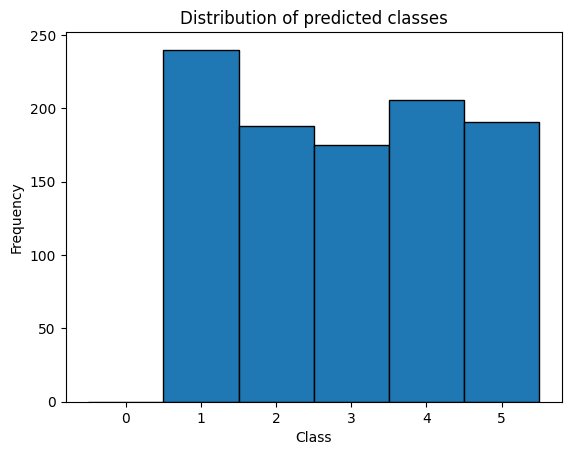

In [55]:
# Convert predictions to label indexes using argmax
predicted_labels = np.argmax(predictions, axis=1)

# Plot the distribution of predicted classes
plt.hist(predicted_labels, bins=np.arange(predictions.shape[1] + 1) - 0.5, edgecolor='black')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Distribution of predicted classes')
plt.show()

In [56]:
# Save the predicted labels to a numpy file
np.save('labels22_nn.npy', predicted_labels)

In [57]:
# Load the predicted labels
loaded_labels = np.load('labels22_nn.npy')

In [58]:
# Print the first 20 entries of the predicted labels
print(loaded_labels[:400])

[5 2 4 1 4 1 2 4 3 4 3 5 1 2 1 5 5 3 5 1 5 5 5 1 1 2 1 3 2 2 2 2 2 1 2 2 3
 5 3 3 1 2 2 5 4 2 1 5 2 4 3 2 1 2 1 3 2 5 2 4 1 1 3 2 1 3 3 1 1 4 1 4 5 1
 1 2 4 3 5 1 1 5 4 4 1 5 5 4 5 2 4 2 3 5 2 4 5 2 4 1 4 1 1 4 3 5 2 4 3 2 5
 2 5 4 5 3 1 5 3 4 2 1 1 1 4 5 3 2 5 2 1 5 5 1 4 1 2 1 4 2 4 4 2 4 5 5 2 1
 4 3 3 1 2 3 3 3 4 5 4 1 1 1 2 3 4 4 5 2 1 1 1 1 2 2 3 5 4 5 1 1 5 5 3 3 4
 3 4 3 1 3 5 3 2 5 3 2 1 2 5 1 3 1 2 1 5 5 3 2 3 5 4 5 1 4 5 1 1 5 3 3 1 1
 4 4 4 2 5 4 4 1 3 2 1 2 3 4 4 3 3 4 2 5 1 2 4 5 1 5 3 2 1 1 3 4 4 2 3 2 2
 3 1 5 1 5 1 5 4 2 3 1 4 4 1 1 5 2 1 3 4 4 2 5 1 1 2 2 2 5 4 5 4 3 1 2 2 3
 3 4 3 5 4 1 1 4 2 4 1 4 1 2 1 4 4 3 4 2 4 4 4 4 5 3 5 5 3 2 1 4 1 5 3 1 3
 1 4 2 1 1 3 3 3 4 2 5 1 1 2 2 4 1 4 4 3 4 5 5 4 5 1 1 2 1 2 4 3 3 3 2 4 2
 5 1 3 3 5 5 5 4 3 4 3 5 3 3 2 4 4 3 2 5 4 2 4 1 2 3 4 5 3 5]
